# Assignment A2 [40 marks]

The assignment consists of 3 exercises. Each exercise may contain coding and/or discussion questions.
- Type your **code** in the **code cells** provided below each question.
- For **discussion** questions, use the **Markdown cells** provided below each question, indicated by 📝. Double-click these cells to edit them, and run them to display your Markdown-formatted text. Please refer to the Week 1 tutorial notebook for Markdown syntax.

---
## Question 1: Numerical Differentiation [10 marks]

A general $N$-point finite difference approximation of the derivative $F' \left( x \right)$ of a sufficiently smooth function $F \left( x \right)$ can be written as

$$
F' \left( x \right) \approx \frac{1}{\Delta x} \sum_{i = 1}^N \alpha_i F \left( x + \beta_i \Delta x \right),
\qquad \qquad \qquad (1)
$$

with step size $\Delta x > 0$, and $\alpha_i, \beta_i \in \mathbb{Q}$, with $\beta_i \neq \beta_j$ for $i\neq j$. For example, the centred difference approximation $D_C(x)$ seen in the course has $N = 2$, and

$$
\begin{cases}
\alpha_1 = \frac{1}{2}, &\alpha_2 = -\frac{1}{2}, \\
\beta_1 = 1, &\beta_2 = -1,
\end{cases}
\qquad
\text{giving} \quad
F'(x) \approx \frac{1}{2\Delta x} \left(F\left(x + \Delta x\right) - F\left(x - \Delta x\right)\right).
$$

**1.1** Consider another finite difference approximation defined as in $(1)$, this time with $N=3$, and

$$
\begin{cases}
\alpha_1 = -\frac{4}{23}, &\alpha_2 = -\frac{9}{17}, &\alpha_3 = \frac{275}{391} \\
\beta_1 = -\frac{3}{2}, &\beta_2 = -\frac{1}{3}, &\beta_2 = \frac{4}{5}
\end{cases}.
$$

Investigate the accuracy of this approximation.

**[5 marks]**

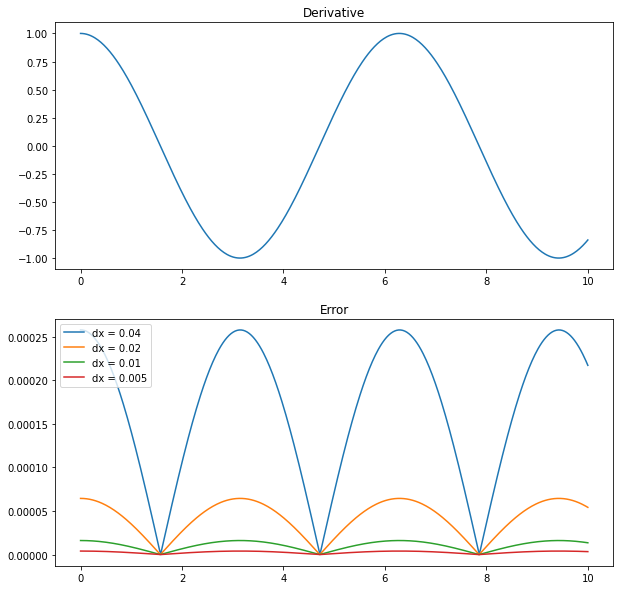

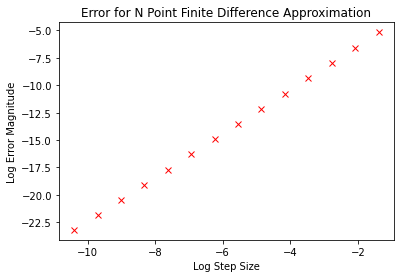

Order: 2.0024917191095972


In [2]:
import numpy as np
import matplotlib.pyplot as plt


###########################################################################
########################### N Point Function ##############################
###########################################################################

def N_point(alphas,betas,dx,x,f,N):
    
    result = 0
    
    for i in range(N):                                               # Iterate through each N
        
        loop = (1/dx) * (alphas[i] * f(x + (betas[i] * dx)))         # Apply the formula given in question
        
        result += loop                                               # Sum the result of each N  

    return result

###########################################################################
########################### Some Variables ################################
###########################################################################

f = lambda x: np.sin(x)     
f_prime = lambda x: (np.cos(x))                                      # Derivative of f(x), used to compare results to actual value

dx = [0.04,0.02,0.01,0.005]
x = np.linspace(0,10,500)
alphas = [-4/23,-9/17,275/391]
betas = [-3/2,-1/3,4/5]
n = 3

###########################################################################
########################### Plot the Error ################################
###########################################################################

f_prime_exact = f_prime(x)                                            # The actual value of the derivative at x

fig, ax = plt.subplots(2,1, figsize = (10,10))

ax[0].plot(x,f_prime_exact, label = 'Exact')                          # Plot the real derivative
ax[0].set_title('Derivative')

for step_size in dx:                                                  # Loop through each timestep
    
    f_prime_approx = N_point(alphas,betas,step_size,x,f,3)            # For each dt calculate the approximation using N point function
    
    ax[1].plot(x,np.abs(f_prime_exact - f_prime_approx),label = f'dx = {step_size}') # Plot the absolute error between real value and value calculated using N point

ax[1].set_title('Error')
ax[1].legend(loc = 'upper left')
plt.show()

##############################################################################
####################### Investigate Order of Accuracy#########################
##############################################################################

x0 = 1                                                             # Pick a constant x value to investigate order
dx = np.logspace(-2,-15,14,base=2)                                 # Logarithmically spaced dx
f_prime_exact = f_prime(x0)                                        # The exact derivative of the function  

err = []

for step_size in dx:                                               # Iterate through each step size
    
    f_prime_approx = N_point(alphas,betas,step_size,x0,f,3)        # Calculate the the approximation for each different step size
    
    err.append(np.abs(f_prime_exact - f_prime_approx))             # Calculate the absolute error and add it to a list

fig1, ax1 = plt.subplots()                                         # Plot the doubly logged graph of the errors against the step size
ax1.plot(np.log(dx),np.log(err), 'rx')
ax1.set(xlabel = 'Log Step Size', ylabel = 'Log Error Magnitude', title = 'Error for N Point Finite Difference Approximation')
plt.show()

line_coeffs = np.polyfit(np.log(dx), np.log(err), 1)               # Find gradient of line in order to get the order
order = line_coeffs[0]            
print(f'Order: {order}')


**1.2** For an arbitrary choice of $\beta_i$ values, what is the minimum number of points $N_{p}$ required to find an approximation $(1)$ which is at least $p$th order accurate?

*Hint:* consider the Taylor expansion of $F \left( x + \beta_i \Delta x \right)$ around $x$.

**[3 marks]**

***📝 Discussion for question 1.2***

For an arbitrary choice of $\beta_i$ values, the minimum number of points $N_{p}$ required to find an approximation which is at least $p$th order accurate is equal to $p+1$.

$N_{p} = p + 1$

When expanding approximation $(1)$ using Taylor expansions, with $N = n$ we get that:

$$
F'(x) \approx (\frac{\alpha_1}{\Delta x} ... + \frac{\alpha_n}{\Delta x})F(x) + (\alpha_1\beta_1 + ... + \alpha_n\beta_n)F'(x) + (\frac{\alpha_1\beta_1^2\Delta x}{2!}+ ... +\frac{\alpha_n\beta_n^2\Delta x}{2!} )F''(x) + (\frac{\alpha_1\beta_1^3\Delta x^2}{3!}+  ...+\frac{\alpha_n\beta_n^3\Delta x^2}{3!})F'''(x) ...
$$

For the pth order of accuracy, the error must be dominated by a term with ${\Delta x}^p$ in it. This can be found in the term of the above Taylor expansion with the $p+1$th derivative. 


This can be seen more clearly when turning the above approximation into the following system of linear equation (linear as $\beta_i$ values are known): 

$(\alpha_1 + ... + \alpha_n) = 0 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; F(x)$

$(\alpha_1\beta_1 + ... + \alpha_n\beta_n) = 1 \;\;\;\;\;\;\;\;\;\;\; F'(x)$

$(\alpha_1\beta_1^2 + ... + \alpha_n\beta_n^2) = 0 \;\;\;\;\;\;\;\;\;\; F''(x)$

$(\alpha_1\beta_1^3 + ... + \alpha_n\beta_n^3) = 0 \;\;\;\;\;\;\;\;\;\; F'''(x)$

$\vdots$

$(\alpha_1\beta_1^k + ... + \alpha_n\beta_n^k) = 0 \;\;\;\;\;\;\;\;\;\; F^k(x)$


For the pth order of accuracy, the number of betas $N_p$ must equal $p+1$ so that the first $p+1$ equations can be solved. This would leave the error to be dominated by the next term: $\frac{\Delta x^p F^{p+1}(x)}{(p+1)!}$. This is evidenced by the fact that the first equation after the $p+1$th equation (the equation equivalent to the first term of the errors) contains a factor of $\Delta x^p$.




**1.3** Using your reasoning from **1.2**, write a function `FD_coefficients()` which, given $N_p$ values $\beta_i$, returns $N_p$ coefficients $\alpha_i$ such that the approximation $(1)$ is at least $p$th order accurate.

Use your function to obtain the coefficients $\alpha_i$ from **1.1**.

**[2 marks]**

In [2]:
##########################################
############### Function #################
##########################################

def FD_coefficients(betas):
    
    length = betas.size                                                         # To reduce code duplication
    
    coefficients = np.zeros((length,length))                                    # Create coefficients matrix
    
    coefficients[0] = 1                                                         # Set first row of coefficient matrix   
    
    for i in range(1,length):                                                   # Fill remainder of coefficient matrix
        
        for j in range(0,length):
            
            coefficients[i][j] = betas[j]**i
            
    constants = np.zeros((length,1))                                             # Create constant results vector
    
    constants[1] = 1
    
    result = np.linalg.solve(coefficients,constants)                             # Solve the linear system of equations
    
    return result



##########################################
############ a_i Coefficients ############
##########################################
a_i = np.array([-4/23,-9/17,275/391])
b_i = np.array([-3/2,-1/3,4/5])                                                  # Coefficients from 1.1 

test = FD_coefficients(b_i)                                                      # Solve system for above betas 
 
for i in range(0,3):               
                  
    if abs(test[i][0] - a_i[i]) < 1e-12:                                         # Check values are correct
        
        print(f'The calculated a_{i} = {test[i][0]} which is approximately the real a_{i} = {a_i[i]}')

The calculated a_0 = -0.1739130434782609 which is approximately the real a_0 = -0.17391304347826086
The calculated a_1 = -0.5294117647058824 which is approximately the real a_1 = -0.5294117647058824
The calculated a_2 = 0.7033248081841432 which is approximately the real a_2 = 0.7033248081841432


---
## Question 2: Root Finding [10 marks]

Consider the following polynomial of cubic order,

$$
p(z) = z^3 + (c-1)z - c,
$$
where $c \in \mathbb{C}$.

This polynomial is complex differentiable, and we can apply Newton's method to find a complex root $z_\ast$, using a complex initial guess $z_0 = a_0 + ib_0$. In this problem, we seek to map the values of $z_0$ which lead to convergence to a root of $p$.

**2.1** Write a function `complex_newton(amin, amax, bmin, bmax, c, N, eps, target_roots)` which implements Newton's method to find roots of $p(z)$ using $N^2$ initial guesses $z_0 = a_0 + ib_0$. The input arguments are as follows:

- The real part $a_0$ of the initial guess should take `N` linearly spaced values between `amin` and `amax` (inclusive).
- The imaginary part $b_0$ of the initial guess should take `N` linearly spaced values between `bmin` and `bmax` (inclusive).
- `c` is the parameter $c \in \mathbb{C}$ in $p(z)$.
- `eps` is the tolerance $\varepsilon > 0$.
- `target_root` takes one of the following values:
    - if `target_root` is given as `None`, then convergence should be considered as achieved if Newton's method has converged to any root of $p$.
    - if `target_root` is given as a number, then convergence should only be considered as achieved if Newton's method has converged to the specific root $z_\ast =$ `target_root`.

Your function should return an array `kmax` of size $N \times N$, containing the total number of iterations required for convergence, for each value of $z_0$. You should decide what to do in case a particular value of $z_0$ doesn't lead to convergence.
    
Up to 2 marks will be given to solutions which iterate over each value of $z_0$. To obtain up to the full 4 marks, your implementation should be vectorised -- i.e. use a single loop to iterate Newton's method for all values of $z_0$ at once.

**[4 marks]**

In [13]:
##########################################
########## Create matrix of z0s ##########
##########################################

# This function creates my matrix of z0s using only a single for loop

def get_z0_matrix(amin,amax,bmin,bmax,N):
    
    a_space = np.linspace(amin, amax, N)             # Get real values in range
    b_space = np.linspace(bmin,bmax,N)*1j            # Get imaginary values in range

    matrix = np.zeros((N, N), dtype=complex)         # Create empty N x N matrix 

    for i in range(N):
        
        matrix[:,i] = a_space[i] + b_space           # Fill in matrix
    
    return matrix

##########################################
############# Define F and F' ############
##########################################

def F(z,c):                                # Define F and F' to be used in the Newtons method
    return z**3 + (c-1)*z - c

def Fp(z,c):
    return 3*z**2 + (c-1)

##########################################
######### Complex Newton for 1 z0 ########
##########################################

# This function uses the Newton Method to find the root from a single point z0

def comp_newton(z0,c, eps, target_root):
    
    k = 0                                 # Iteration counter 
    result = 0
    while True:

        k+=1
        
        z_new = z0 - F(z0,c)/Fp(z0,c)     # Newton Method Formula
    
        # Check if the method has converged based on a tolerance eps or a target root given as a parameter
        if (target_root == None and abs(z_new - z0) <= eps) or (target_root != None and abs(z_new - target_root) <= eps):
            
            result = float(k)             # Return number of iterations
            break
            
        elif k>= 20:                      # If the number of iterations goes above 20, assume the method wont converge
            
            result = np.nan               # Return nan if there is no convergence 
            break                  

        z0 = z_new
            

    return result

##########################################
#### Complex Newton for matrix of z0s ####
##########################################

# Vectorizes the comp_newton method above so that it works for a matrix of z0's rather than just a single z0

def complex_newton(amin,amax,bmin,bmax,c,N,eps,target_root):
    
    z0s = get_z0_matrix(amin,amax,bmin,bmax,N)                    # Get a matrix of z0 values
    
    comp_newton_vec = np.vectorize(comp_newton,otypes=[float])    # Vectorize comp_newton 
    
    return comp_newton_vec(z0s,c, eps, target_root)              # Return the vectorized comp_newton with the z0 matrix as parameter   
 

    
##########################################
################## Test ##################
##########################################

test = complex_newton(-5,5,-5,5,0,200,1e-12,1)
print(test)


[[nan nan nan ... 12. 12. 12.]
 [nan nan nan ... 12. 12. 12.]
 [nan nan nan ... 12. 12. 12.]
 ...
 [nan nan nan ... 12. 12. 12.]
 [nan nan nan ... 12. 12. 12.]
 [nan nan nan ... 12. 12. 12.]]


**2.2** For $c = 0$, $a_0 \in [-5,5]$ and $b_0 \in [-5,5]$, with at least $N = 200$ values for each (you can increase $N$ if your computer allows it), use your function `complex_newton()` to calculate, for each $z_0 = a_0 + ib_0$, the total number of iterates needed to reach a disk of radius $\varepsilon$ around the root at $z = 1$. Present your results in a heatmap plot, with $a_0$ on the abscissa, $b_0$ on the ordinate and a colour map showing the total number of iterates. 

**[3 marks]**

<ipython-input-14-7469d3c3296f>:25: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = ax.pcolor(x,y,result)


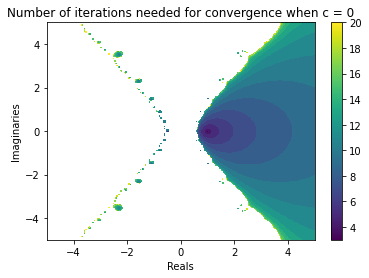

In [14]:
##########################################
############### Constants ################
##########################################

amin = -5
amax = 5
bmin = -5
bmax = 5
N = 500

###########################################
############### Axis for plot #############
###########################################

x = np.linspace(amin,amax,N)                    # Have the axis show reals on the x-axis and imaginary on the y-axis
y = np.linspace(bmin,bmax,N)

###########################################
############### Heat Map Plot #############
###########################################

result = complex_newton(amin,amax,bmin,bmax,0,N,1e-12,1)  # Get the data of number of iterations for the graph

fig, ax = plt.subplots()                        # Heatmap plot with above axis and data
c = ax.pcolor(x,y,result)
fig.colorbar(c,ax=ax)
ax.set(xlabel = 'Reals', ylabel = 'Imaginaries', title = 'Number of iterations needed for convergence when c = 0')
plt.show()

**2.3** For $c = 0.32 + 1.64i$, map out the points $z_0$ for which Newton's method does not converge to any root. What does it do instead?

*Hint:* Pick a point $z_0$ in a region where Newton's method does not converge and print out, say, 50 iterates. What do you observe?

**[3 marks]**

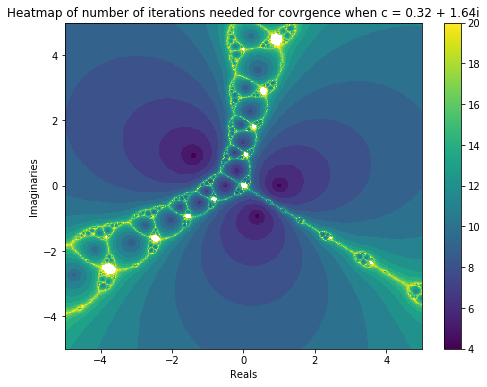

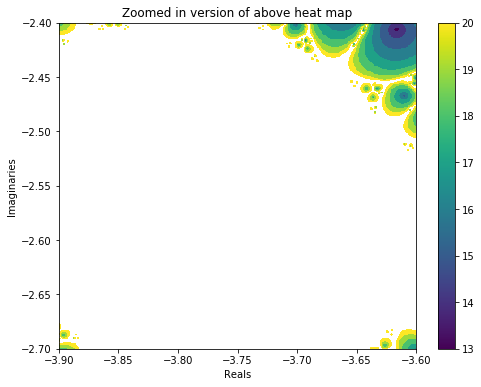

Last few iterations: 
[(0.7840460884342668-0.5203600464769713j), (0.00197786322614224+0.011704367404154592j), (0.7840460884342781-0.5203600464769765j), (0.0019778632262096307+0.01170436740412173j), (0.7840460884342784-0.5203600464769738j), (0.001977863226211629+0.011704367404138494j), (0.7840460884342776-0.5203600464769738j), (0.0019778632262070772+0.011704367404138494j), (0.7840460884342777-0.520360046476974j), (0.0019778632262078544+0.01170436740413705j)]


In [5]:
##########################################
############## First Plot ################
##########################################

amin = -5                      # Constants
amax = 5
bmin = -5
bmax = 5
N = 400

x = np.linspace(amin,amax,N)   # Values for x and y axis
y = np.linspace(bmin,bmax,N)

trial = complex_newton(amin, amax, bmin, bmax, 0.32 + 1.64j, N, 10**(-10), None) 

fig, ax = plt.subplots(figsize = (8,6))       # This should so the entire plot
c = ax.pcolor(x,y,trial)
fig.colorbar(c,ax=ax)
ax.set(xlabel = 'Reals', ylabel = 'Imaginaries', title = 'Heatmap of number of iterations needed for covrgence when c = 0.32 + 1.64i')

plt.show()

##########################################
############### Zoomed In ################
##########################################

# From the above plot we can see that there area white areas where the method fails to coverge
# We can zoom in on these white areas by editing the constant values used above


amin = -3.9                            # Picking a smaller region of points to look at
amax = -3.6
bmin = -2.7
bmax = -2.4
N = 400

x = np.linspace(amin,amax,N)           # Setting the axis
y = np.linspace(bmin,bmax,N)

zoomed = complex_newton(amin, amax, bmin, bmax, 0.32 + 1.64j, N, 10**(-10), None) # Data zoomed in

fig, ax = plt.subplots(figsize = (8,6)) # Zoomed in plot
c = ax.pcolor(x,y,zoomed)
fig.colorbar(c,ax=ax)
ax.set(xlabel = 'Reals', ylabel = 'Imaginaries', title = 'Zoomed in version of above heat map')

plt.show()

##########################################
######## Newtons Method for a z0 #########
##########################################

# From the region zoomed in above, we see that there exists a z0 = -3.80 - 2.55i where the method does not converge.
# We can now iterate over this point 50 times using Newtons method

z = -3.85 - 2.55j                    # Setting the value of z0

zs = []                              # List to append iterations of newton method

for i in range(50):                  # Newtons method iterated 50 times
    
    z_new = z - F(z,0.32 + 1.64j)/Fp(z,0.32 + 1.64j) # Formula for newtons method
    
    if abs(z_new - z) < 1e-12:       # Check for convergence with a tolerance of 1e-12
        break
            
    z = z_new 
    zs.append(z)
    
print("Last few iterations: ")
print(zs[-10:])                      # Print the results of the last few iterations


***📝 Discussion for question 2.3***

When picking a z0 whereby Newton's Method does not converge, after a certain number of iterations, the method gets stuck between 2 guesses / iterations. The method just cycles back and forth between 2 values and never converges. When using $z0 = -3.80 - 2.55i$, the method gets stuck in a 2-cycle with $0.780 - 0.520i$ and $0.00198 + 0.117i$.

---
## Question 3: Numerical Integration of an ODE [20 marks]

Cardiac tissue is an example of an excitable medium, where a small stimulus can lead to a large response (a heart beat). The FitzHugh-Nagumo model describes the electrical activity of a single cardiac cell in terms of the transmembrane potential $u$ and a recovery variable $v$

\begin{align}
        \dot u & = f(u,v) = \frac{1}{\varepsilon} \left( u - \frac{u^3}{3} - v + I \right) \ , \\
        \dot v & = g(u,v) = \varepsilon \left( u - \gamma v + \beta \right) \ ,
\end{align}

where $I$ (a stimulus), $\varepsilon$, $\gamma$, and $\beta$ are known parameters.

The equation for $u$ leads to fast dynamics with the possibility of excitation, while the linear term proportional to $-v$ in the equation for the recovery variable produces slower dynamics and negative feedback. The FitzHugh-Nagumo model is an example of a stiff differential equation, where the stiffness becomes more pronounced for smaller $\varepsilon$.

In questions **3.1**, **3.2**, and **3.3**, we take $\varepsilon = 0.2$, $\gamma = 0.8$, and $\beta = 0.7$.


**3.1** The fixed points, defined by $\dot u = f(u, v) = 0$ and $\dot v = g(u, v) = 0$, correspond to the state of a cell at rest. Write a function `resting_state()` to determine the values $(u_I^*, v_I^*)$ for the cell in its resting state for a given value of $I$ and a given initial guess $(u_{I, 0}, v_{I, 0})$, using Newton's method.

Use your function to compute $(u_I^*, v_I^*)$ for $I=0$ and $I = 0.5$, with initial guess $(u_{I, 0}, v_{I, 0}) = (0.2, 0.2)$.


**[5 marks]**

In [17]:

def resting_state(u0,v0,I,epsilon,gamma,beta):
    
    f = lambda x: (1/epsilon)*(x[0]-(x[0]**3/3)-x[1] + I)           # Define the functions f and g
    g = lambda x: epsilon*(x[0]-(gamma*x[1])+beta)
    
    dfdu = lambda x: (1/epsilon)*(1 - x[0]**2)                      # Get terms of the jacobian
    dfdv = lambda x: (1/epsilon)*(-1)
    dgdu = lambda x: epsilon
    dgdv = lambda x: (-gamma)*epsilon
    
    jac = lambda x: np.array([[dfdu(x),dfdv(x)], [dgdu(x),dgdv(x)]],dtype = 'float').reshape(2,2)
    
    i = 0                                                           # Set constant values 
    maxiter = 1000
    tol =1e-12
    error = 100
    
    x_0 = np.array([u0,v0]).reshape(2,1)                            # Initial values in a numpy array 

    while np.any(abs(error) > tol ) and i < maxiter:                # Loop until value is accurate enough or until the maximum amount of iterations has happened

        F_x_0 = np.array([f(x_0),g(x_0)]).reshape(2,1)              # Find the values of f and g at the inital values
        
        jac_x = jac(x_0)                                            # Get the jacobian at x 
                        
        calc = np.linalg.solve(jac_x,F_x_0)                         # Instead of using inverse of matrices to maintain accuracy

        x_new = x_0 - calc                                          # Formula of Newtons method

        error = x_new - x_0

        x_0 = x_new

        i = i+1                                                     # Increase iteration counter
        
    return x_new

#testing the functions

epsilon = 0.2                                                       # Set the constants for the functions f and g
gamma = 0.8
beta = 0.7

u0,v0 = 0.2,0.2                                                     # Set the initial values 

result = resting_state(u0,v0,0,epsilon,gamma,beta)                  # Calculate the resting state values for I = 0

u_0_star = result[0][0]                                                # Extract the resting state values 
v_0_star = result[1][0]

print("u_0* = ", u_0_star)
print("v_0* = ", v_0_star)

print("")

result = resting_state(u0,v0,0.5,epsilon,gamma,beta)                # Calculate the resting state values for I = 0.5

u_05_star = result[0][0]                                               # Extract the resting state values
v_05_star = result[1][0]


print("u_0.5* = ", u_05_star)
print("v_0.5* = ", v_05_star)


u_0* =  -1.199408035244035
v_0* =  -0.6242600440550437

u_0.5* =  -0.8048477470083343
v_0.5* =  -0.1310596837604179


<ipython-input-17-99eacb72e0ed>:11: DeprecationWarning: setting an array element with a sequence. This was supported in some cases where the elements are arrays with a single element. For example `np.array([1, np.array([2])], dtype=int)`. In the future this will raise the same ValueError as `np.array([1, [2]], dtype=int)`.
  jac = lambda x: np.array([[dfdu(x),dfdv(x)], [dgdu(x),dgdv(x)]],dtype = 'float').reshape(2,2)


**3.2** Using the method of your choice **\***, compute the numerical solution $(u_n, v_n) \approx (u(n\Delta t), v(n\Delta t)), n=0, 1, 2, \dots$ for the FitzHugh-Nagumo model.

You should compute the solution for both $I = 0$ and $I = 0.5$, starting at time $t = 0$ until at least $t = 100$, with $(u_0 = 0.8, v_0 = 0.8)$ as the initial condition.

Present your results graphically by plotting

(a) $u_n$ and $v_n$ with **time** (not time step) on the x-axis,  
(b) $v_n$ as a function of $u_n$. This will show what we call the solution trajectories in *phase space*.

You should format the plots so that the data presentation is clear and easy to understand.

Given what this mathematical model describes, and given that $I$ represents a stimulus, how do you interpret your results for the two different values of $I$? Describe your observations in less than 200 words.


**\*** You may use e.g. the forward Euler method seen in Week 7 with a small enough time step, or use one of the functions provided by the `scipy.integrate` module, as seen in Quiz Q4.

\begin{align}
        \dot u & = f(u,v) = \frac{1}{\varepsilon} \left( u - \frac{u^3}{3} - v + I \right) \ , \\
        \dot v & = g(u,v) = \varepsilon \left( u - \gamma v + \beta \right) \ ,
\end{align}




**[7 marks]**

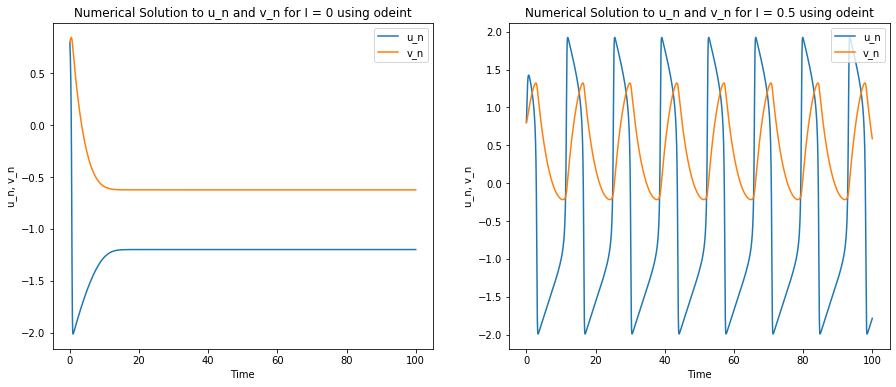

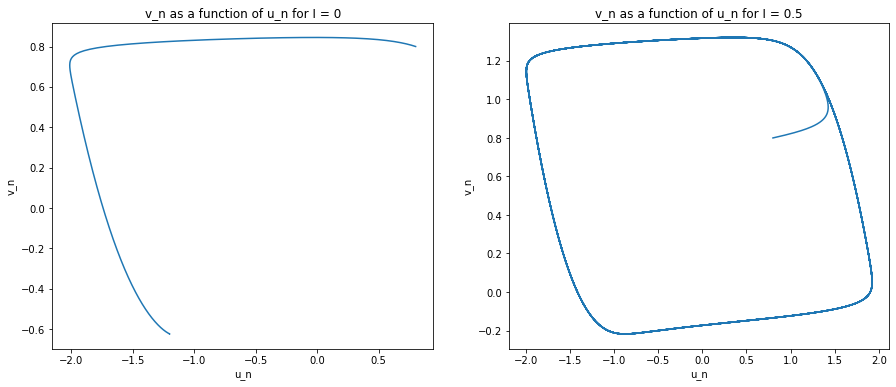

In [7]:
from scipy.integrate import odeint

def odes(x,t,I,gamma):                  # Function to combine the ODE's
    
    epsilon = 0.2                       # Constants for f and g
    beta = 0.7
    
    u = x[0]                            # Initial values 
    v = x[1]
    
    f = (1/epsilon)*(u-(u**3/3)-v + I)  # Define f and g
    g = epsilon*(u-(gamma*v)+beta)
    
    return [f,g]                        # Return results of ODE's at a point x = (u,v)  

##################################################
#################### Part A ######################
##################################################

t =np.linspace(0,100,10000)             # Set constants 

I_0 = (0,0.8)                           # Set I = 0 and gamma = 0.8

x0 = np.array([0.8,0.8])                # Initial values  

x_0 = odeint(odes,x0,t,I_0)             # Solve the ODE's with above initial values at I = 0

I_05 = (0.5,0.8)                        # Set I = 0.5 and gamma = 0.8

x_05 = odeint(odes,x0,t,I_05)           # Solve the ODE's with above initial values at I = 0.5

us_0 = []                               # Lists to store values of u's and v's at I = 0
vs_0 = []
 
for i in x_0:                           # Extract values of u and v at I = 0 and append them to lists
    
    us_0.append(i[0])
    vs_0.append(i[1])


us_05 = []                              # Lists to store values of u's and v's at I = 0.5 
vs_05 = []

for i in x_05:                          # Extract values of u and v at I = 0 and append them to lists
    
    us_05.append(i[0])
    vs_05.append(i[1])


fig, ax = plt.subplots(1,2, figsize = (15,6))  # Plot u_n and v_n against time on the same axis , once for I = 0 and once for I = 0.5

ax[0].plot(t,us_0,label = 'u_n')
ax[0].plot(t,vs_0,label = 'v_n')
ax[1].plot(t,us_05,label = 'u_n')
ax[1].plot(t,vs_05, label = 'v_n')

ax[0].set(xlabel = 'Time', ylabel = 'u_n, v_n', title = 'Numerical Solution to u_n and v_n for I = 0 using odeint')
ax[1].set(xlabel = 'Time', ylabel = 'u_n, v_n', title = 'Numerical Solution to u_n and v_n for I = 0.5 using odeint')

ax[0].legend()
ax[1].legend(loc='upper right')


##################################################
#################### Part B ######################
##################################################

fig1, ax1 = plt.subplots(1,2, figsize = (15,6))  # Plot v_n as a function of u_n once for I = 0 and once for I = 0.5

ax1[0].plot(us_0,vs_0)
ax1[1].plot(us_05,vs_05)

ax1[0].set(xlabel = 'u_n', ylabel = 'v_n', title = 'v_n as a function of u_n for I = 0')
ax1[1].set(xlabel = 'u_n', ylabel = 'v_n', title = 'v_n as a function of u_n for I = 0.5')

plt.show()

***📝 Discussion for question 3.2***

When there is no stimulus $(I = 0)$, $u_n$ and $v_n$ quickly converge to the resting states found in 3.1. As there is no stimulus, there is no response in the excitable tissue (e.g there is no heartbeat) and so there are no oscillations in the transmembrane potential and the recovery variable. The potential and recovery variable instead converge to a constant value.

When there is no stimulus $(I = 0)$, the graph of $v_n$ as a function of $u_n$ is not closed / does not return to its starting value. This means that there is no periodic oscillation of the recovery and potential variables and thus no activity in the cardiac tissue. 

However, when there is stimulus $(I = 0.5)$, there is a response (activity) in the excitable tissue (e.g there is enough stimulus to produce a heartbeat). As a certain stimulus threshhold has been exceeded, the potential and recovery variables oscillate in a non sinusoidal manner. 

When the stimulus is equal to 0.5, the graph of $v_n$ in terms of $u_n$ is closed / returns to its starting value. This means that there is periodic oscillation in the variables thus leading to activity in the cell. 


**3.3** Compute the eigenvalues of the Jacobi matrix
        
$$
\large
\begin{pmatrix}
    \frac{\partial f}{\partial u} & \frac{\partial f}{\partial v} \\ 
    \frac{\partial g}{\partial u} & \frac{\partial g}{\partial v}
\end{pmatrix}_{u = u_I^*, v = v_I^*}
$$

evaluated at the fixed points $u = u_I^*, v = v_I^*$, for $I = 0$ and $I = 0.5$. What do you observe?

*You may use NumPy built-in functions to compute eigenvalues.*


**[3 marks]**

In [8]:
epsilon = 0.2                                                # Constants for f and g
gamma = 0.8
beta = 0.7

fixed_0 = np.array([u_0_star, v_0_star]).reshape(2,1)          # Format the fixed point values u and v in a numpy array for both I = 0 and I = 0.5
fixed_05 = np.array([u_05_star, v_05_star]).reshape(2,1)

dfdu = lambda x: (1/epsilon)*(1 - x[0]**2)                      # Get terms of the jacobian
dfdv = lambda x: (1/epsilon)*(-1)
dgdu = lambda x: epsilon
dgdv = lambda x: (-gamma)*epsilon

jac = lambda x: np.array([[dfdu(x),dfdv(x)], [dgdu(x),dgdv(x)]],dtype = 'float').reshape(2,2) # Jacobian function

jac_0 = jac(fixed_0)                                          # Calculate jacobians at fixed points  
jac_05 = jac(fixed_05)


eig_0 = np.linalg.eigvals(jac_0)                              # Calculate the eignvalues of the jacobians found above
eig_05 = np.linalg.eigvals(jac_05)

print(f'Eigenvalues for I = 0 -> {eig_0}')
print("")
print(f'Eigenvalues for I = 0.5 -> {eig_05}')




Eigenvalues for I = 0 -> [-1.35857198 -0.9943262 ]

Eigenvalues for I = 0.5 -> [0.80055026+0.27810645j 0.80055026-0.27810645j]


***📝 Discussion for question 3.3***

When $(I = 0)$, the Jacobian Matrix has real non-zero eigenvalues. This means that the matrix is invertible and has a linear transformation from the Reals to the Reals.

When $(I = 0.5)$, the Jacobian Matrix has non - zero complex eigenvalues. In fact, these eigenvalues are complex conjugates of each other .This means that the matrix is invertible, with complex eigenvectors and has a rotation as its linear transformation.

**3.4** For this question, we set $I = 0$ and $\gamma = 5$.

(a) Use the function `resting_state()` you wrote for **3.1** to find three fixed points, $(u_{(0)}^*, v_{(0)}^*)$, $(u_{(1)}^*, v_{(1)}^*)$ and $(u_{(2)}^*, v_{(2)}^*)$, using the initial conditions provided in the NumPy array `uv0` below (each row of the array constitutes a pair of initial conditions for one of the three fixed points).

(b) Compute the numerical solution $(u_n, v_n), n=0, 1, 2, \dots$ using the initial condition $(u_{(0)}^* + \delta, v_{(0)}^* + \delta)$, for $\delta \in \{0, 0.3, 0.6, 1.0\}$. This simulates the activity of a cell starting at a small perturbation $\delta$ of one of its resting states, in this case $(u_{(0)}^*, v_{(0)}^*)$.

Plot your results in a similar way as in question **3.2**, and discuss your observations in less than 150 words. In particular, does the solution always return to the same fixed point, i.e. the same resting state?

**[5 marks]**

u_0* = 1.4529016889173565
v_0* = 0.43058033778347127

u_1* = 0.17732319353744583
v_1* = 0.17546463870748916

u_2* = -1.6302248824548025
v_2* = -0.1860449764909605



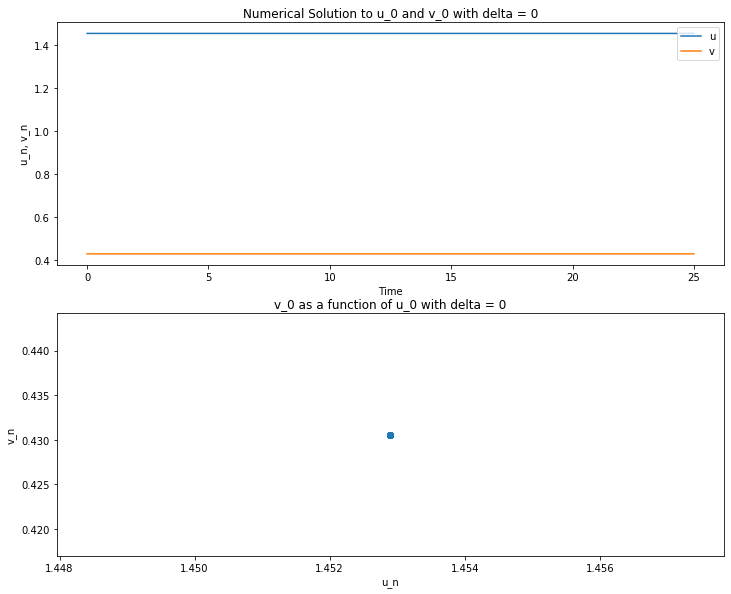

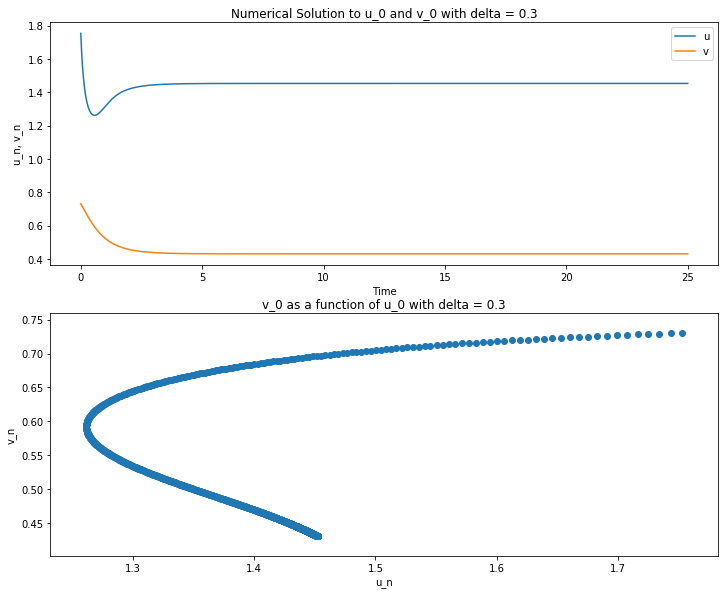

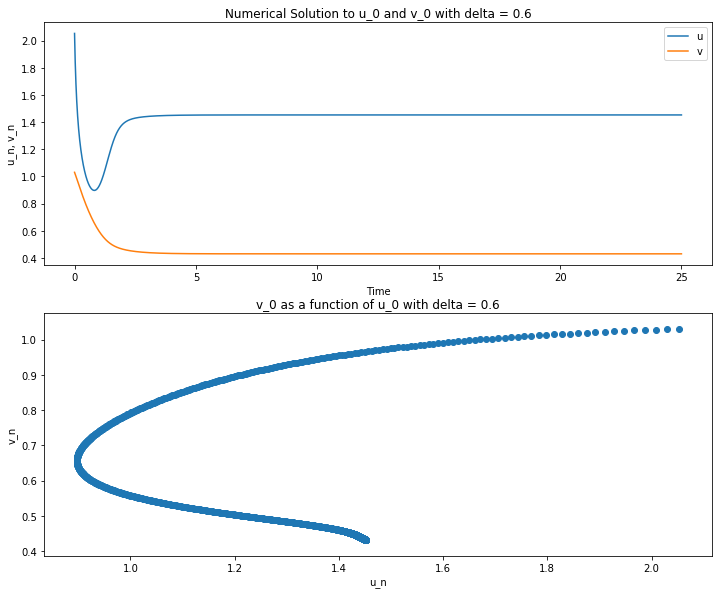

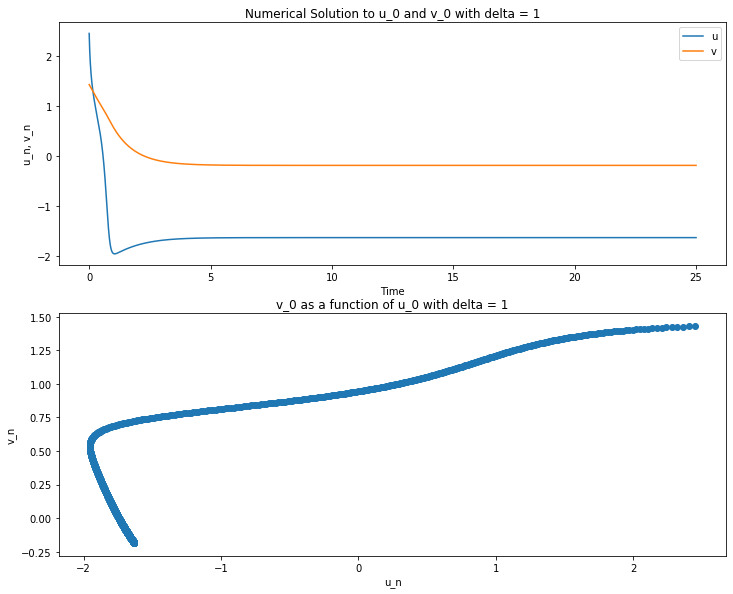

In [52]:
##################################################
#################### Constants ###################
##################################################

epsilon = 0.2                                              # Set constants for the functions f and g 
gamma = 5
beta = 0.7
I = 0

uv0 = np.array([[0.9, 0.6],                                 # Initial conditions given in the question
                [0.0, 0.4],
                [-1.7, -0.3]])

##################################################
#################### Part A ######################
##################################################

resting_states = []                                         # List to store all the fixed values calculated with resting state function

for i in uv0:                                               # Iterte through each starting point given in questio n
    
    rest = resting_state(i[0],i[1],I,epsilon,gamma,beta)    # Calculate the fixed points / resting states
    
    resting_states.append(rest)                             # Store these in a list

for i in range(len(resting_states)):                        # Extract and print the resting states for each 3 initial values
    
    print(f'u_{i}* = {resting_states[i][0][0]}')
    print(f'v_{i}* = {resting_states[i][1][0]}')
    print("")
    
##################################################
#################### Part B ######################
##################################################

t =np.linspace(0,25,10000)                                   # Set the times
deltas = [0,0.3,0.6,1]                                       # Deltas given in the question

I_star = (0, gamma)                                          # Set I = 0 and gamma = 5
    
u_n_star = resting_states[0][0][0]                       # Extract the resting states to be used as initial conditions
v_n_star = resting_states[0][1][0]

for delta in deltas:                                     # Iterate through each delta to get a total of 12 pairs of (u,v) initial values

    x0 = np.array([u_n_star + delta, v_n_star + delta])  # Set the initial values as a numpy array 
    x_0 = odeint(odes,x0,t,I_star)                       # Solve the ODE's with inital values set above and I = 0, gamma = 5
    us = []                                              # Lists to store values of u's and v's at I = 0, gamma = 5
    vs = []

    fig, ax = plt.subplots(2, figsize = (10,8)) 
    fig.tight_layout()
    plt.subplots_adjust(hspace = 0.2)
    
    for i in x_0:                                        # Extact u's and v's and store them in lists for plotting  

        us.append(i[0])
        vs.append(i[1])

    ax[0].plot(t,us,label = f'u')                        # Plot u against time 
    ax[0].plot(t,vs,label = f'v')                        # Plot v agaisnt time

    ax[1].scatter(us,vs)                                 # Plot v as a function of u
    
    ax[0].set(xlabel = 'Time', ylabel = 'u_n, v_n', title = f'Numerical Solution to u_0 and v_0 with delta = {delta}')
    ax[0].legend(loc = "upper right")
    ax[1].set(xlabel = 'u_n', ylabel = 'v_n', title = f'v_0 as a function of u_0 with delta = {delta}')


***📝 Discussion for question 3.4***

The solution does not always return to the same resting / fixed point $(u =1.453, v =0.431)$. As the $\delta$'s vary, so do the initial conditions, thus leading to the solutions converging at different points. We can see that as $\delta$ gets larger, the solutions end up further from the fixed point $(u_0, v_0)$. This is because as $\delta$ becomes larger, the starting points also get further from the fixed point.

When $\delta = 0$, the solutions are horizontal lines; this makes sense as the initial conditions for this case are resting states. When $\delta$ has a small value of either $0.3$ or $0.6$ the solutions return to the original resting state. However when $\delta$ becomes large enough at $\delta = 1$, the solution converges to a new resting state. Hence we can define some threshold value of $\delta$ that is the minimum $\delta$ such that the solutin of the system does not return to the initial resting state.

